# Part I - (Go to College Data Exploration)

## by Onajite Ika

## Introduction

## Go to college Dataset:

The [Go-to-college dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset?sort=votes) is based on high school college attendance in Indonesia. This dataset focuses on indicators that boost college attendance. 

**Indicator Descriptions:**

- `type_school`: we have 2 types of high school (student age 15-18) here: vocational high school, and academic high school. Student choose vocational high school usually because they want to quickly get job, so my assumption is students who are in vocational high school won't go to college as much as students of academic high school.
- `school_accreditation`: A is the best, followed by B and C. While school accreditation doesn't measure student continuity to college, but college admission see school accreditation as one of the student's qualification. So higher accreditation -> more university option.
- `gender`: male / female
- `interest`: interest to go to college. While it may seem very correlated, but based on my own experience it really doesn't. Students who are interested to go to college usually forced by their parents to go to college, and students who are very interested to go to college may aim for the best college and don't get accepted, so they have a gap year.
- `residence`: urban, rural, etc.
- `parent_age`: parent age
- `parent_salary`: monthly salary in Indonesian rupiah (IDR). 1 USD ~ 14500 IDR. I think this variable will also be important here. going to college requires money.
- `house_area`: house area in m2
- `average_grades`: averaged high school grades. Max = 100. A criteria for student's to qualify for college.
- `parent_was_in_college`: Whether or not parents attended college or not.
- `will_go_to_college`: Will student attend college or not.


## Preliminary Wrangling

In [1]:
# # import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



In [2]:
col_df = pd.read_csv('data.csv')
col_df #to display the table

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
5,Vocational,B,Female,Less Interested,Rural,48,3770000,65.3,86.79,True,False
6,Academic,A,Male,Very Interested,Rural,52,6680000,85.5,90.39,True,True
7,Academic,B,Male,Very Interested,Rural,53,5890000,83.3,84.65,True,False
8,Academic,B,Female,Uncertain,Rural,52,6730000,80.3,88.50,True,True
9,Academic,B,Female,Very Interested,Rural,47,3880000,68.0,85.43,True,False


In [3]:
#columns in the dataset
col_df.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'will_go_to_college'],
      dtype='object')

In [4]:
#Nan counts
col_df.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [5]:
# No null
col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
type_school              1000 non-null object
school_accreditation     1000 non-null object
gender                   1000 non-null object
interest                 1000 non-null object
residence                1000 non-null object
parent_age               1000 non-null int64
parent_salary            1000 non-null int64
house_area               1000 non-null float64
average_grades           1000 non-null float64
parent_was_in_college    1000 non-null bool
will_go_to_college       1000 non-null bool
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.3+ KB


In [6]:
#descriptive statistics
col_df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [7]:
#check for duplicates
col_df.duplicated().any()

False

### What is the structure of your dataset?

The dataset I'm working on contains 1000 rows and 11 columns of students accessed based on different thematic areas

### What is/are the main feature(s) of interest in your dataset?

1. type_school
2. gender
3. interest
4. residence
5. parent_salary
6. average_grade
7. parent_was_in college
8. will go to college (dependent feature)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

All features will help support my investigation as they will help answer the question of why a student will go to college of not

# Univariate Exploration

In [8]:
#This function will make plots easier with x taking the column title to be plotted
def func (x):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sb.countplot(x, data=col_df)
    plt.title(f'Distribution of {x}')
    plt.xlabel(x)
    


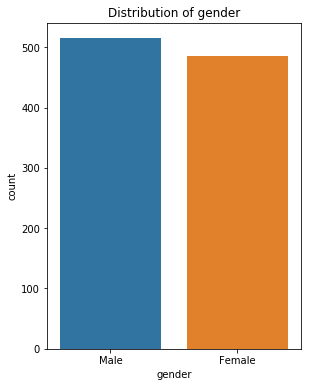

In [9]:
func ('gender')

> We have more male students represented than female in the dataset, though not a large difference

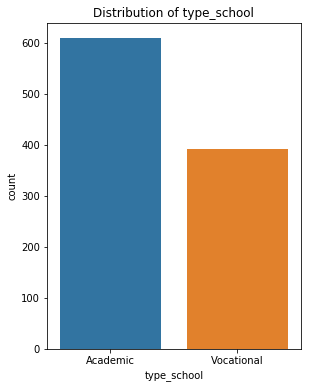

In [10]:
func ('type_school')

> Academic school choice is more than Vocational, this may be because of the residence or the fact that students will most likely want to attend academic schools

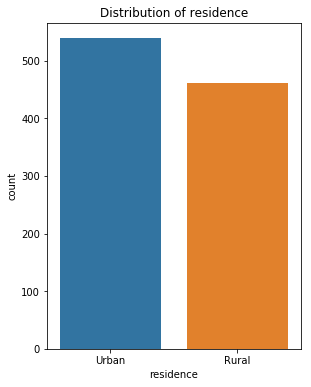

In [11]:
func ('residence')

> having more urban student residence may be the reason we have more Academic schools than vocational. We may want to say, we have academic school types in the rural areas and vocational in the rural area

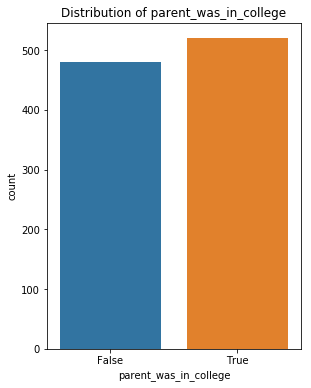

In [12]:
func ('parent_was_in_college')

> We have more parents who wnet to college than those who didn't

In [13]:
col_df.interest.unique() #unique values of the column 'interest'

array(['Less Interested', 'Very Interested', 'Uncertain', 'Not Interested',
       'Interested'], dtype=object)

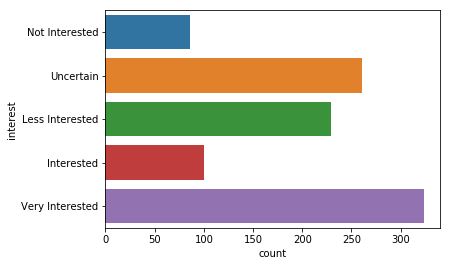

In [14]:
interest_order = ['Not Interested','Uncertain', 'Less Interested','Interested', 'Very Interested']
sb.countplot(data=col_df, y='interest', order=interest_order)

> Students are very interested to go to school followed by those who are uncertain

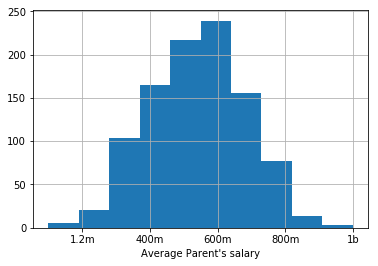

In [15]:
col_df.parent_salary.hist()
plt.xticks([0.2e7,0.4e7,0.6e7,0.8e7,1.0e7],['1.2m','400m','600m','800m','1b']);
plt.xlabel('Average Parent\'s salary');

> parent salary is unimodal, evenly distributed

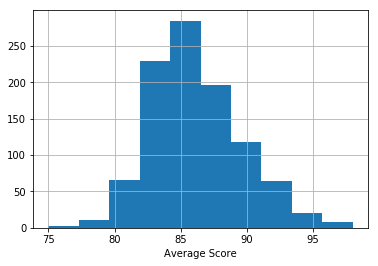

In [16]:
col_df.average_grades.hist()
plt.xlabel('Average Score');

> Unimodal distribution, where most scores are average. 

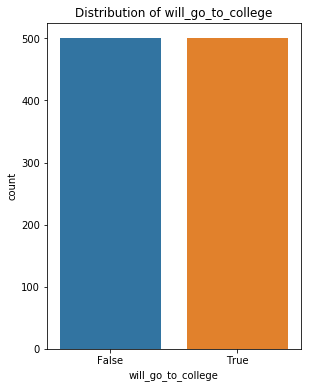

In [17]:
func ('will_go_to_college')

> there is obviously a balance between those that want to go to college and those that want to go.

## Bivariate Analysis

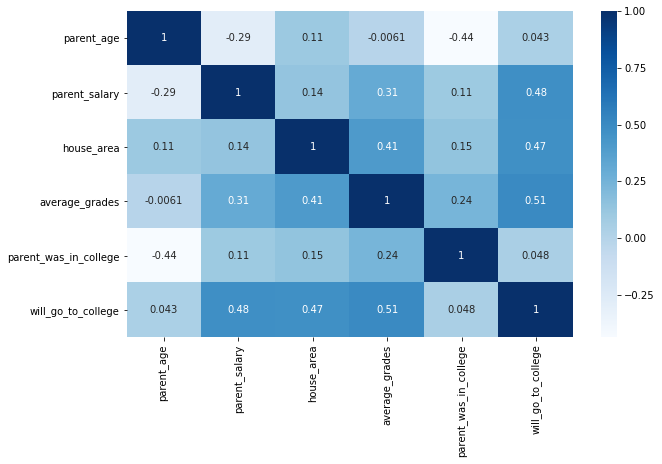

In [18]:
#heatmap to showcase relationship between variables
plt.figure(figsize=(10,6))
sb.heatmap(col_df.corr(), cmap='Blues', annot=True)

> Based on pearson correlation coefficient, `average_grades` and `will_go_to_college` are slightly postively correlated, `parent_salary` and `will_go_to_college` are slightly correlated too, others are negatively correlated.

**Let's plot it and see if we can detect some patterns.**

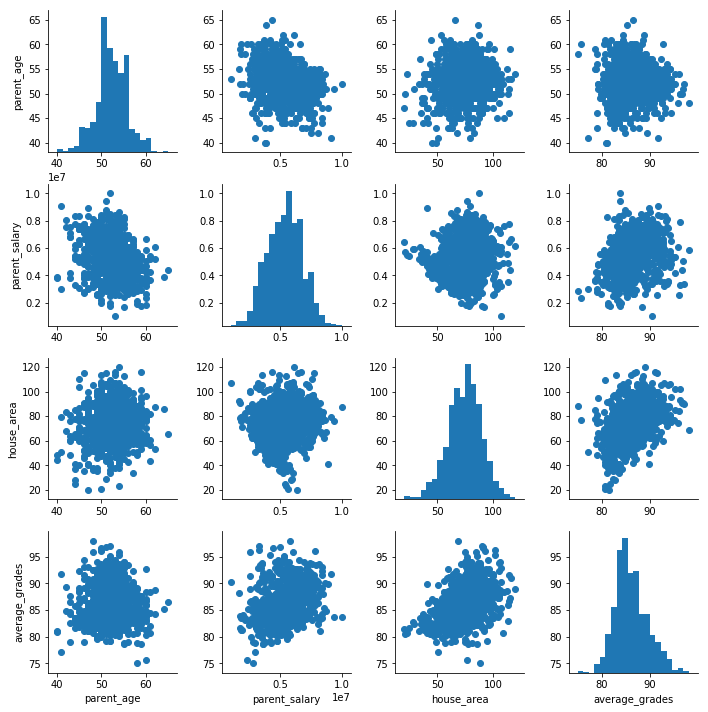

In [19]:
# lets see the result of the correlation in pairwise plot
var = ['parent_age','parent_salary','house_area','average_grades']
g = sb.PairGrid(data =col_df, vars = var, diag_sharey = False)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> No more significant correlations.

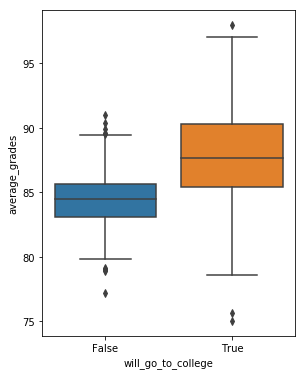

In [20]:
#let's see the average_grade and will_go_to_college

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sb.boxplot(data=col_df, x='will_go_to_college', y='average_grades');


> we can see that average score has profound effect on going to college as those with higher scores are going to college. where the minimum score of those that go to college is higher than the maximum score of those that didnt go to college.

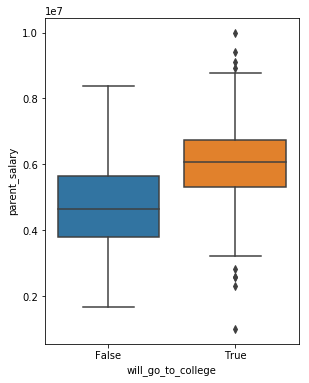

In [21]:
#let's see the parent_salary and will_go_to_college

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sb.boxplot(data=col_df, x='will_go_to_college', y='parent_salary');


> parents who earn higher have more children enrolled in colleges than those who earn lower.

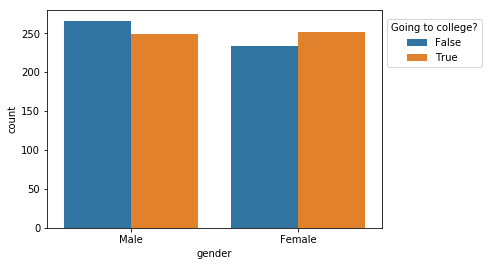

In [22]:
#gender vs going to college
sb.countplot(data=col_df, x='gender', hue='will_go_to_college')
plt.legend(title='Going to college?', loc='center left', bbox_to_anchor=(1, 0.85));
 

> though we know that the dataset contains more male students, females then to go to college than male (though the difference isn't significant)

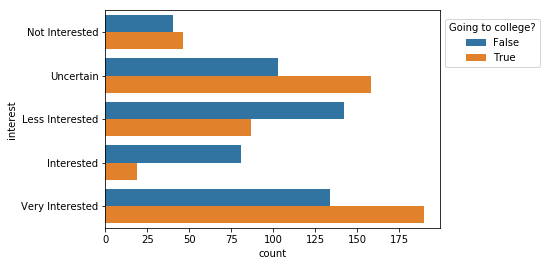

In [23]:
#interest vs go to college
sb.countplot(data=col_df, hue='will_go_to_college', y='interest', order=interest_order)
plt.legend(title='Going to college?',loc='center left', bbox_to_anchor=(1, 0.85))

> Those who indicated 'very interested' has higher college attendance.

> Students who were 'uncertain' and 'less interested' has higher number of students going to college than those who were interested.

## Multivariate Analysis

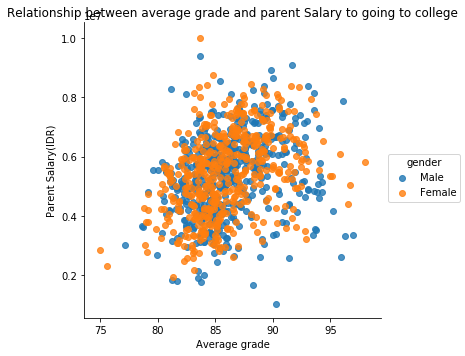

In [24]:
# Relationship between average grade, parent salary and going to college
sb.lmplot(data=col_df, x='average_grades', y='parent_salary', hue='gender', fit_reg=False);
plt.title('Relationship between average grade and parent Salary to going to college')
plt.ylabel('Parent Salary(IDR)')
plt.xlabel('Average grade');

> Having good grades with parents who earn good salaries tends to increase chances of a student going to college

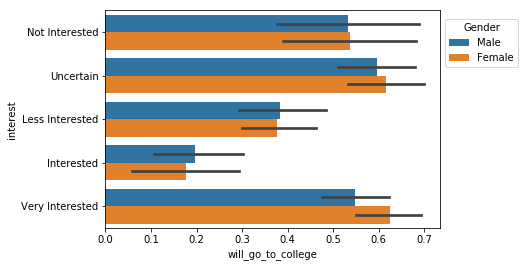

In [25]:
sb.barplot(data=col_df, x='will_go_to_college', y='interest', hue='gender', order=interest_order)
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1, 0.85))

> This gives more emphasis on more female going to colleges.

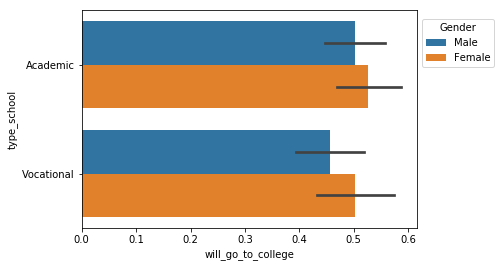

In [26]:
sb.barplot(data=col_df, x='will_go_to_college', y='type_school', hue='gender')
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1, 0.85));

> There are more female students going to college and vocational schools

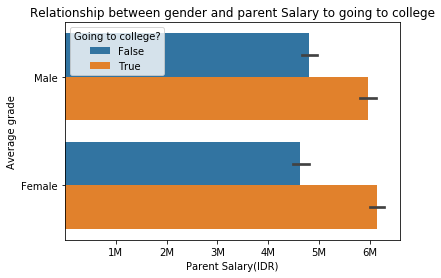

In [27]:
#let's see if we have more parents of female students who earn more 

sb.barplot(data=col_df, x='parent_salary', y='gender', hue='will_go_to_college')
plt.legend(title='Going to college?');
plt.xticks([1000000, 2000000, 3000000, 4000000, 5000000, 6000000],['1M', '2M', '3M', '4M', '5M', '6M'])
plt.title('Relationship between gender and parent Salary to going to college')
plt.xlabel('Parent Salary(IDR)')
plt.ylabel('Average grade');

> This shows we have more female students with parents earning good salaries. Maybe the reason more females are in school than male

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The correlation between parent salary and will go to college and average grades

### Were there any interesting or surprising interactions between features?

> It was interesting we have more male student in the dataset than female but have more female going to college 

## Conclusions
> We may think that a child is most likely to attend college if he/she has parents who went to college but from the heat map, we see a weak correlation. From the visualizations, we see that three things are to be considered in deciding whether or not a student will go to college: Grade, parents salary and a weak maybe gender.
